# Tutorial: Train single cell data using random context method

## Introduction

This tutorial demonstrates how to use **scGenAI** to train a model for predicting cell types from single-cell RNA sequencing (scRNA-seq) data. In this example, we apply the **random context** method to generate input sequences.

**Note:**
1. The dataset used for this tutorial is reported in [**Hu et. al., 2021**](https://pubmed.ncbi.nlm.nih.gov/35046994/). The input data train and validation files can be downloaded from link of [**GSE181989**](https://zenodo.org/records/14036452).
2. In this tutorial, we will load the model template directly from the cache folder.
3. While the model in this example is trained to predict cell types, it can be used to predict any feature in practical applications.


**Reference**
1. Tonglin, H., Yanna, Z., Xiaoling, Y., Ruilan, G., & Liming, Y. (2022). Single-Cell RNA-Seq of Bone Marrow Cells in Aplastic Anemia. Frontiers in genetics, 12, 745483. https://doi.org/10.3389/fgene.2021.745483




## Train the Model Using Genelist (Multiple GPU)

The training process can be easily initiated by calling the `run_training_from_config` function in **scGenAI**, using the input files specified in a configuration YAML file. 


In [5]:
from scGenAI.training.train import run_training_from_config

model_dir: /home/ubuntu/fulldataset/model/GSE181989BW_random_context/
train_file: /home/ubuntu/fulldataset/GSE181989_train.h5ad
val_file: /home/ubuntu/fulldataset/GSE181989_val.h5ad
log_dir: /home/ubuntu/scgenai/examples/logs/
output_dir: /home/ubuntu/scgenai/examples/output
seed: 1314521
cache_dir: /home/ubuntu/scgenai/examples/tmp/cache
mode: Train
min_cells: 50
target_feature: ct
multiomics: No
keepIntermediateFiles: Yes
savelog: Yes
savesetting: Yes
model_backbone_name: llama
model_backbone_size: small
context_method: random
num_bins: 10
optimizer: AdamW
weight_decay: 0.01
depth: 2
max_length: 5120
batch_size: 1
learning_rate: 1e-05
num_epochs: 30
world_size: 1
evaluate_during_training: True
hidden_size: 256
num_layers: 6
num_heads: 4
intermediate_size: 1024
stride: 2560


2024-10-31 16:12:20.361 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 3, Total GPUs used: 4
2024-10-31 16:12:20.367 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 1, Total GPUs used: 4
2024-10-31 16:12:20.371 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 2, Total GPUs used: 4
2024-10-31 16:12:20.373 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 0, Total GPUs used: 4
2024-10-31 16:12:22.737 | INFO     | scGenAI.training.train:model_train_and_eval:214 - Total number of trainable parameters: 77297940; Max Sequence Legth: 2560 genes
Epoch 1/30: 100%|██████████| 1235/1235 [15:06<00:00,  1.36it/s, GPU_ID=2, train_accuracy=0.337, train_loss=2.25] 


Evaluating Epoch 1/30: 100%|██████████| 1258/1258 [04:54<00:00,  4.27it/s]
2024-10-31 16:32:25.206 | INFO     | scGenAI.training.train:evaluate_an

Plot saved to /home/ubuntu/fulldataset/model/GSE181989BW_random_context/train_summary.pdf


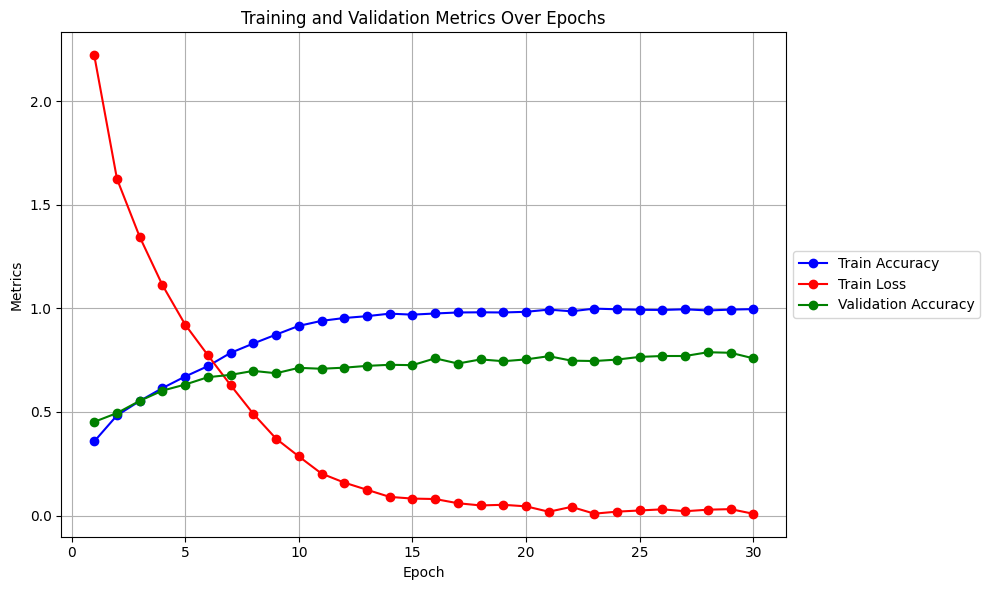

In [6]:
config_file = '/home/ubuntu/scgenai/tutorials/yaml/config_random_context_GSE181989BW_random_context.yaml'
run_training_from_config(config_file)

## Post-Training Model and Results

Upon completion of the training, the trained model will be saved in the `model_dir` as defined in the configuration file. Within this directory, two subfolders will be created: `best_model` and `last_model`. The `best_model` folder contains the model that achieved the highest training performance, while the `last_model` contains the model from the final epoch. Additionally, a `combined_epoch_results.csv` file will be generated in the `model_dir`, summarizing the training performance metrics across all epochs.

### Training Summary

In addition to the output summary files generated after training, the training summary can be directly accessed in Python by loading the saved configuration file.


In [7]:
from scGenAI.config import Config
from scGenAI.data.postprocess import TrainSummary

In [8]:
config = Config(config_file)
summary = TrainSummary(config.model_dir)
dfsummary = summary.table()
dfsummary

,Epoch,Validation Accuracy,Train Loss,Train Accuracy
0,1,0.452340,2.222573,0.357895
1,2,0.494801,1.625801,0.483401
2,3,0.553726,1.345718,0.553036
3,4,0.603120,1.112866,0.615385
4,5,0.632582,0.922101,0.671255
5,6,0.668111,0.774316,0.721457
6,7,0.679376,0.629712,0.785425
7,8,0.698440,0.491152,0.830769
8,9,0.687175,0.371265,0.873684
9,10,0.713172,0.285608,0.915789


It can also be plotted using the `summary.plot`:

Plot saved to /home/ubuntu/fulldataset/model/GSE181989BW_random_context/train_summary.pdf


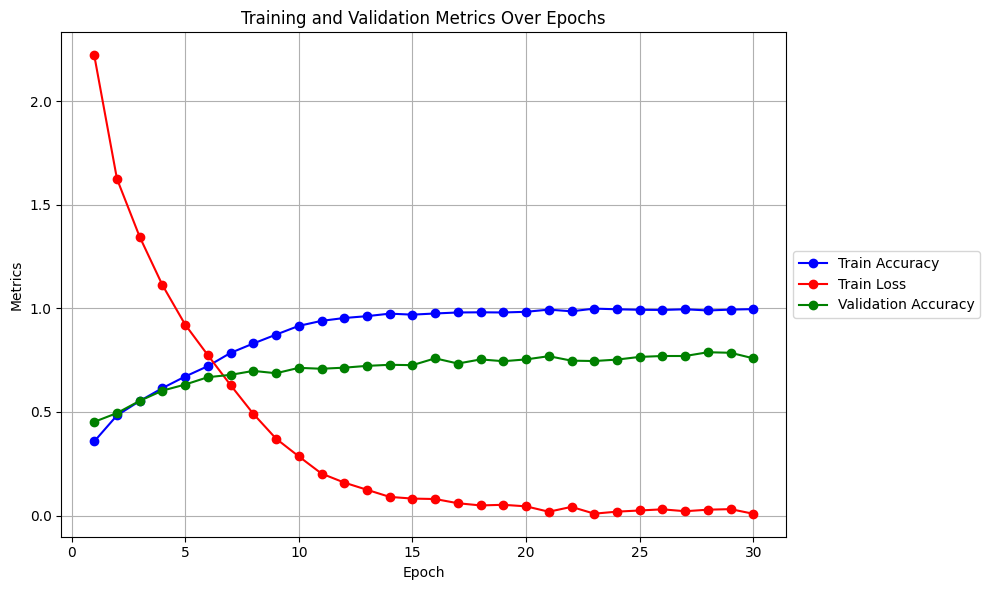

In [9]:
summary.plot(saveplot=True)

## Prediction Using the Trained Model

Similar to the training step, predictions can be run using the `run_prediction_from_config` function in scGenAI with a simple configuration file. Unlike the training configuration, the prediction configuration file only requires the following parameters to be defined: `mode`, `predict_file`, `batch_size`, `model_dir`, and `outputfile`. All other parameters will be adopted from the trained model.


In [10]:
from scGenAI.prediction.predict import run_prediction_from_config

In [11]:
pred_config_file = '/home/ubuntu/scgenai/tutorials/yaml/config_prediction_GSE181989BW_random_context.yaml'
run_prediction_from_config(pred_config_file)

model_dir: /home/ubuntu/fulldataset/model/GSE181989BW_random_context/best_model/
predict_file: /home/ubuntu/fulldataset/GSE181989_val.h5ad
log_dir: /home/ubuntu/scgenai/examples/logs
output_dir: /home/ubuntu/scgenai/examples/output
seed: 1314521
mode: Predict
min_cells: 50
multiomics: No
keepIntermediateFiles: Yes
savelog: No
savesetting: Yes
model_backbone_name: llama
model_backbone_size: small
context_method: random
num_bins: 10
optimizer: AdamW
weight_decay: 0.01
depth: 2
max_length: 5120
batch_size: 1
learning_rate: 1e-05
num_epochs: 30
world_size: 1
evaluate_during_training: False
hidden_size: 768
num_layers: 12
num_heads: 12
intermediate_size: 1024
stride: 2560


2024-11-01 02:42:48.749 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 2, Total GPUs used: 4
2024-11-01 02:42:48.751 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 3, Total GPUs used: 4
2024-11-01 02:42:48.753 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 0, Total GPUs used: 4
2024-11-01 02:42:48.765 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 1, Total GPUs used: 4
GPU 0 Predicting: 100%|██████████| 315/315 [01:12<00:00,  4.35it/s]
2024-11-01 02:44:05.734 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-11-01 02:44:05.734 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-11-01 02:44:05.734 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-11-01 02:44:05.734 | INFO     | scGenAI.utils.

The prediction output is a CSV file, as defined in the configuration file. It contains the original metadata extracted from the input prediction file (`obs` slot) along with three additional columns: `context_id`, `PredictedFeature`, and `prediction_score`. 

- `context_id` represents the context used to determine the prediction for the corresponding cell. 
- `PredictedFeature` is the final predicted feature for the cell using the trained model. 
- `prediction_score` indicates the confidence level of the prediction, with a maximum value of 1.

For example in this tutorials:

In [12]:
import pandas as pd
preconfig = Config(pred_config_file)
dfprediction = pd.read_csv(preconfig.outputfile)
dfprediction.head()

,index,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,sample,sampleId,projectId,sampleType,...,subjectId,age,gender,processStatus,predicted_cell_type,ct,cell_barcode,context_id,PredictedFeature,prediction_score
0,TCGGTAACATCCTTGC-1--GSM5515744,SeuratProject,3523,1238,11,11,GSM5515744,GSM5515744,GSE181989,Normal,...,NaN,NaN,NaN,QC pass,17:granulocyte,Granulocyte,TCGGTAACATCCTTGC-1--GSM5515744,3_TCGGTAACATCCTTGC-1--GSM5515744_window_0,Granulocyte,0.936304
1,CTGTTTAGTCTCGTTC-1--GSM5515743,SeuratProject,3055,942,0,0,GSM5515743,GSM5515743,GSE181989,Normal,...,NaN,NaN,NaN,QC pass,0:naive CD4 T cell,Naive CD4 T cell,CTGTTTAGTCTCGTTC-1--GSM5515743,3_CTGTTTAGTCTCGTTC-1--GSM5515743_window_1,Naive CD4 T cell,0.999776
2,CGAGCCAAGGGTCTCC-1--GSM5515743,SeuratProject,6179,1970,26,26,GSM5515743,GSM5515743,GSE181989,Normal,...,NaN,NaN,NaN,QC pass,20:pDC,Plasmacytoid dendritic cell,CGAGCCAAGGGTCTCC-1--GSM5515743,1_CGAGCCAAGGGTCTCC-1--GSM5515743_window_2,Plasmacytoid dendritic cell,0.998122
3,CCAATCCGTAGCCTCG-1--GSM5515743,SeuratProject,4005,1188,3,3,GSM5515743,GSM5515743,GSE181989,Normal,...,NaN,NaN,NaN,QC pass,5:effector memory CD8 T cell,Effector CD4 T cell,CCAATCCGTAGCCTCG-1--GSM5515743,1_CCAATCCGTAGCCTCG-1--GSM5515743_window_3,Effector CD4 T cell,0.999692
4,GGTGAAGTCGCGATCG-1--GSM5515743,SeuratProject,10333,2663,19,19,GSM5515743,GSM5515743,GSE181989,Normal,...,NaN,NaN,NaN,QC pass,13:cDC2,Conventional dendritic cell,GGTGAAGTCGCGATCG-1--GSM5515743,0_GGTGAAGTCGCGATCG-1--GSM5515743_window_6,Monocyte,0.998477
